In [1]:
#   deep_circles.py
#   Defines a network that can find separate circles of data
#

#   Imports
from sklearn.datasets import make_circles
import numpy as np
import matplotlib.pyplot as plt
import os
#os.environ["TF_CPP_MIN_LOG_LEVEL"]="2"

In [2]:
#   Helper functions
#   plot the data on a figure
def plot_data(pl, X, y):
    # plot class where y==0
    pl.plot(X[y==0, 0], X[y==0,1], 'ob', alpha=0.5)
    # plot class where y==1
    pl.plot(X[y==1, 0], X[y==1,1], 'xr', alpha=0.5)
    pl.legend(['0', '1'])
    return pl

#   Common function that draws the decision boundaries
def plot_decision_boundary(model, X, y):

    amin, bmin = X.min(axis=0) - 0.1
    amax, bmax = X.max(axis=0) + 0.1
    hticks = np.linspace(amin, amax, 101)
    vticks = np.linspace(bmin, bmax, 101)
    
    aa, bb = np.meshgrid(hticks, vticks)
    ab = np.c_[aa.ravel(), bb.ravel()]
    
    # make prediction with the model and reshape the output so contourf can plot it
    c = model.predict(ab)
    Z = c.reshape(aa.shape)

    plt.figure(figsize=(12, 8))
    # plot the contour
    plt.contourf(aa, bb, Z, cmap='bwr', alpha=0.2)
    # plot the moons of data
    plot_data(plt, X, y)

    return plt

In [3]:
# Generate some data blobs.  Data will be either 0 or 1 when 2 is number of centers.
# X is a [number of samples, 2] sized array. X[sample] contains its x,y position of the sample in the space
# ex: X[1] = [1.342, -2.3], X[2] = [-4.342, 2.12]
# y is a [number of samples] sized array. y[sample] contains the class index (ie. 0 or 1 when there are 2 centers)
# ex: y[1] = 0 , y[1] = 1
X, y = make_circles(n_samples=1000, factor=.6, noise=0.1, random_state=42)
#pl = plot_data(plt, X, y)
#pl.show()

# Split the data into Training and Test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create the keras model
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

Using TensorFlow backend.


In [4]:
#   Implement as Functional API
from keras.models import Model#replaces  layer add
from keras.layers import Input#replaces first input layer
#
inputs = Input(shape=(2,))
#   Hidden layers
x = Dense(4, activation="tanh",  name="Hidden-1")(inputs)#last parens are input
#this layer could have a different name but this demo re-uses x
x = Dense(4, activation="tanh", name="Hidden-2")(x)#input here is prior layer
#   Output Layer
o = Dense(1, activation="sigmoid", name="Output_layer")(x)
#   Create Model and specify the input and output
#hidden layers not specified (implicit?)
#could specify a list of inputs or outputs if multiple are needed - can't do this with sequential
model = Model(inputs=inputs, outputs=o)
#   Display summary
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 2)                 0         
_________________________________________________________________
Hidden-1 (Dense)             (None, 4)                 12        
_________________________________________________________________
Hidden-2 (Dense)             (None, 4)                 20        
_________________________________________________________________
Output_layer (Dense)         (None, 1)                 5         
Total params: 37
Trainable params: 37
Non-trainable params: 0
_________________________________________________________________


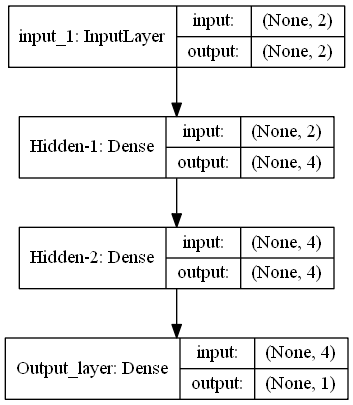

In [6]:
#   Compile the model.  Minimize crossentopy for a binary.  Maximize for accuracy
model.compile(Adam(lr=0.05), 'binary_crossentropy', metrics=['accuracy'])
from keras.utils import plot_model
#return value is the picture - don't have to read from file
plot_model(model, to_file="K04_model_api.png", show_shapes=True, show_layer_names=True)

graphical output from plot_model
<img src='K04_model_api.png'>

In [9]:
#   Define early stopping callback
from keras.callbacks import EarlyStopping
#val_acc deprecated? replaced with val_accuracy
my_callbacks = [EarlyStopping(monitor='val_accuracy', patience=5, mode='max')]

In [10]:
#   Fit the model with the data.  Make 100 cycles through the data.
#       Set verbose to 0 to supress progress messages 
%time model.fit(X_train, y_train, epochs=100, verbose=1, callbacks=my_callbacks, validation_data=(X_test, y_test) )
#   Get loss and accuracy on test data
eval_result = model.evaluate(X_test, y_test)
#   Print test accuracy
print("\n\nTest loss:", eval_result[0], "Test accuracy:", eval_result[1])


Train on 700 samples, validate on 300 samples
Epoch 1/100
700/700 [==============================] - 0s 176us/step - loss: 0.0755 - accuracy: 0.9729 - val_loss: 0.1999 - val_accuracy: 0.9300
Epoch 2/100
700/700 [==============================] - 0s 32us/step - loss: 0.0686 - accuracy: 0.9729 - val_loss: 0.1426 - val_accuracy: 0.9400
Epoch 3/100
700/700 [==============================] - 0s 34us/step - loss: 0.0674 - accuracy: 0.9771 - val_loss: 0.1695 - val_accuracy: 0.9467
Epoch 4/100
700/700 [==============================] - 0s 34us/step - loss: 0.0562 - accuracy: 0.9800 - val_loss: 0.1495 - val_accuracy: 0.9467
Epoch 5/100
700/700 [==============================] - 0s 36us/step - loss: 0.0636 - accuracy: 0.9771 - val_loss: 0.1478 - val_accuracy: 0.9567
Epoch 6/100
700/700 [==============================] - 0s 34us/step - loss: 0.0546 - accuracy: 0.9729 - val_loss: 0.1487 - val_accuracy: 0.9467
Epoch 7/100
700/700 [==============================] - 0s 36us/step - loss: 0.0647 - accu

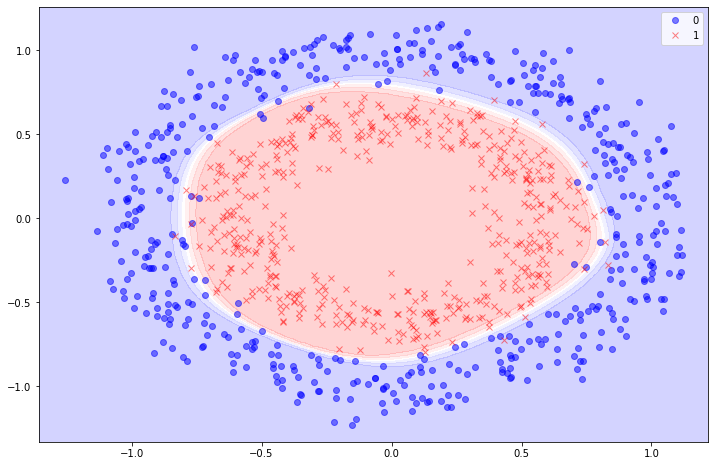

In [11]:
#   Plot the decision boundary
plot_decision_boundary(model, X, y).show()